In [2]:
import os
import re
from sparta.Auxil.PeriodicityDetector import PeriodicityDetector
from sparta.UNICOR.Spectrum import Spectrum
from sparta.UNICOR.Template import Template
from sparta.Auxil.TimeSeries import TimeSeries
from sparta.Observations import Observations
import numpy as np
import pandas as pd
from scipy.signal import find_peaks, peak_prominences
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import sparta.Statistics as stat

In [3]:
delCep_results = []
alfUMi_results = []
SZTau_results = []

for filename in os.listdir('./results_post042018/delCep/'):
    delCep_results.append(stat.open_csv('./results_post042018/delCep/'+filename))
for filename in os.listdir('./results_post042018/alfUMi/'):
    alfUMi_results.append(stat.open_csv('./results_post042018/alfUMi/'+filename))
for filename in os.listdir('./results_post042018/SZTau/'):
    SZTau_results.append(stat.open_csv('./results_post042018/SZTau/'+filename))

In [4]:
plt.style.use('sparta')

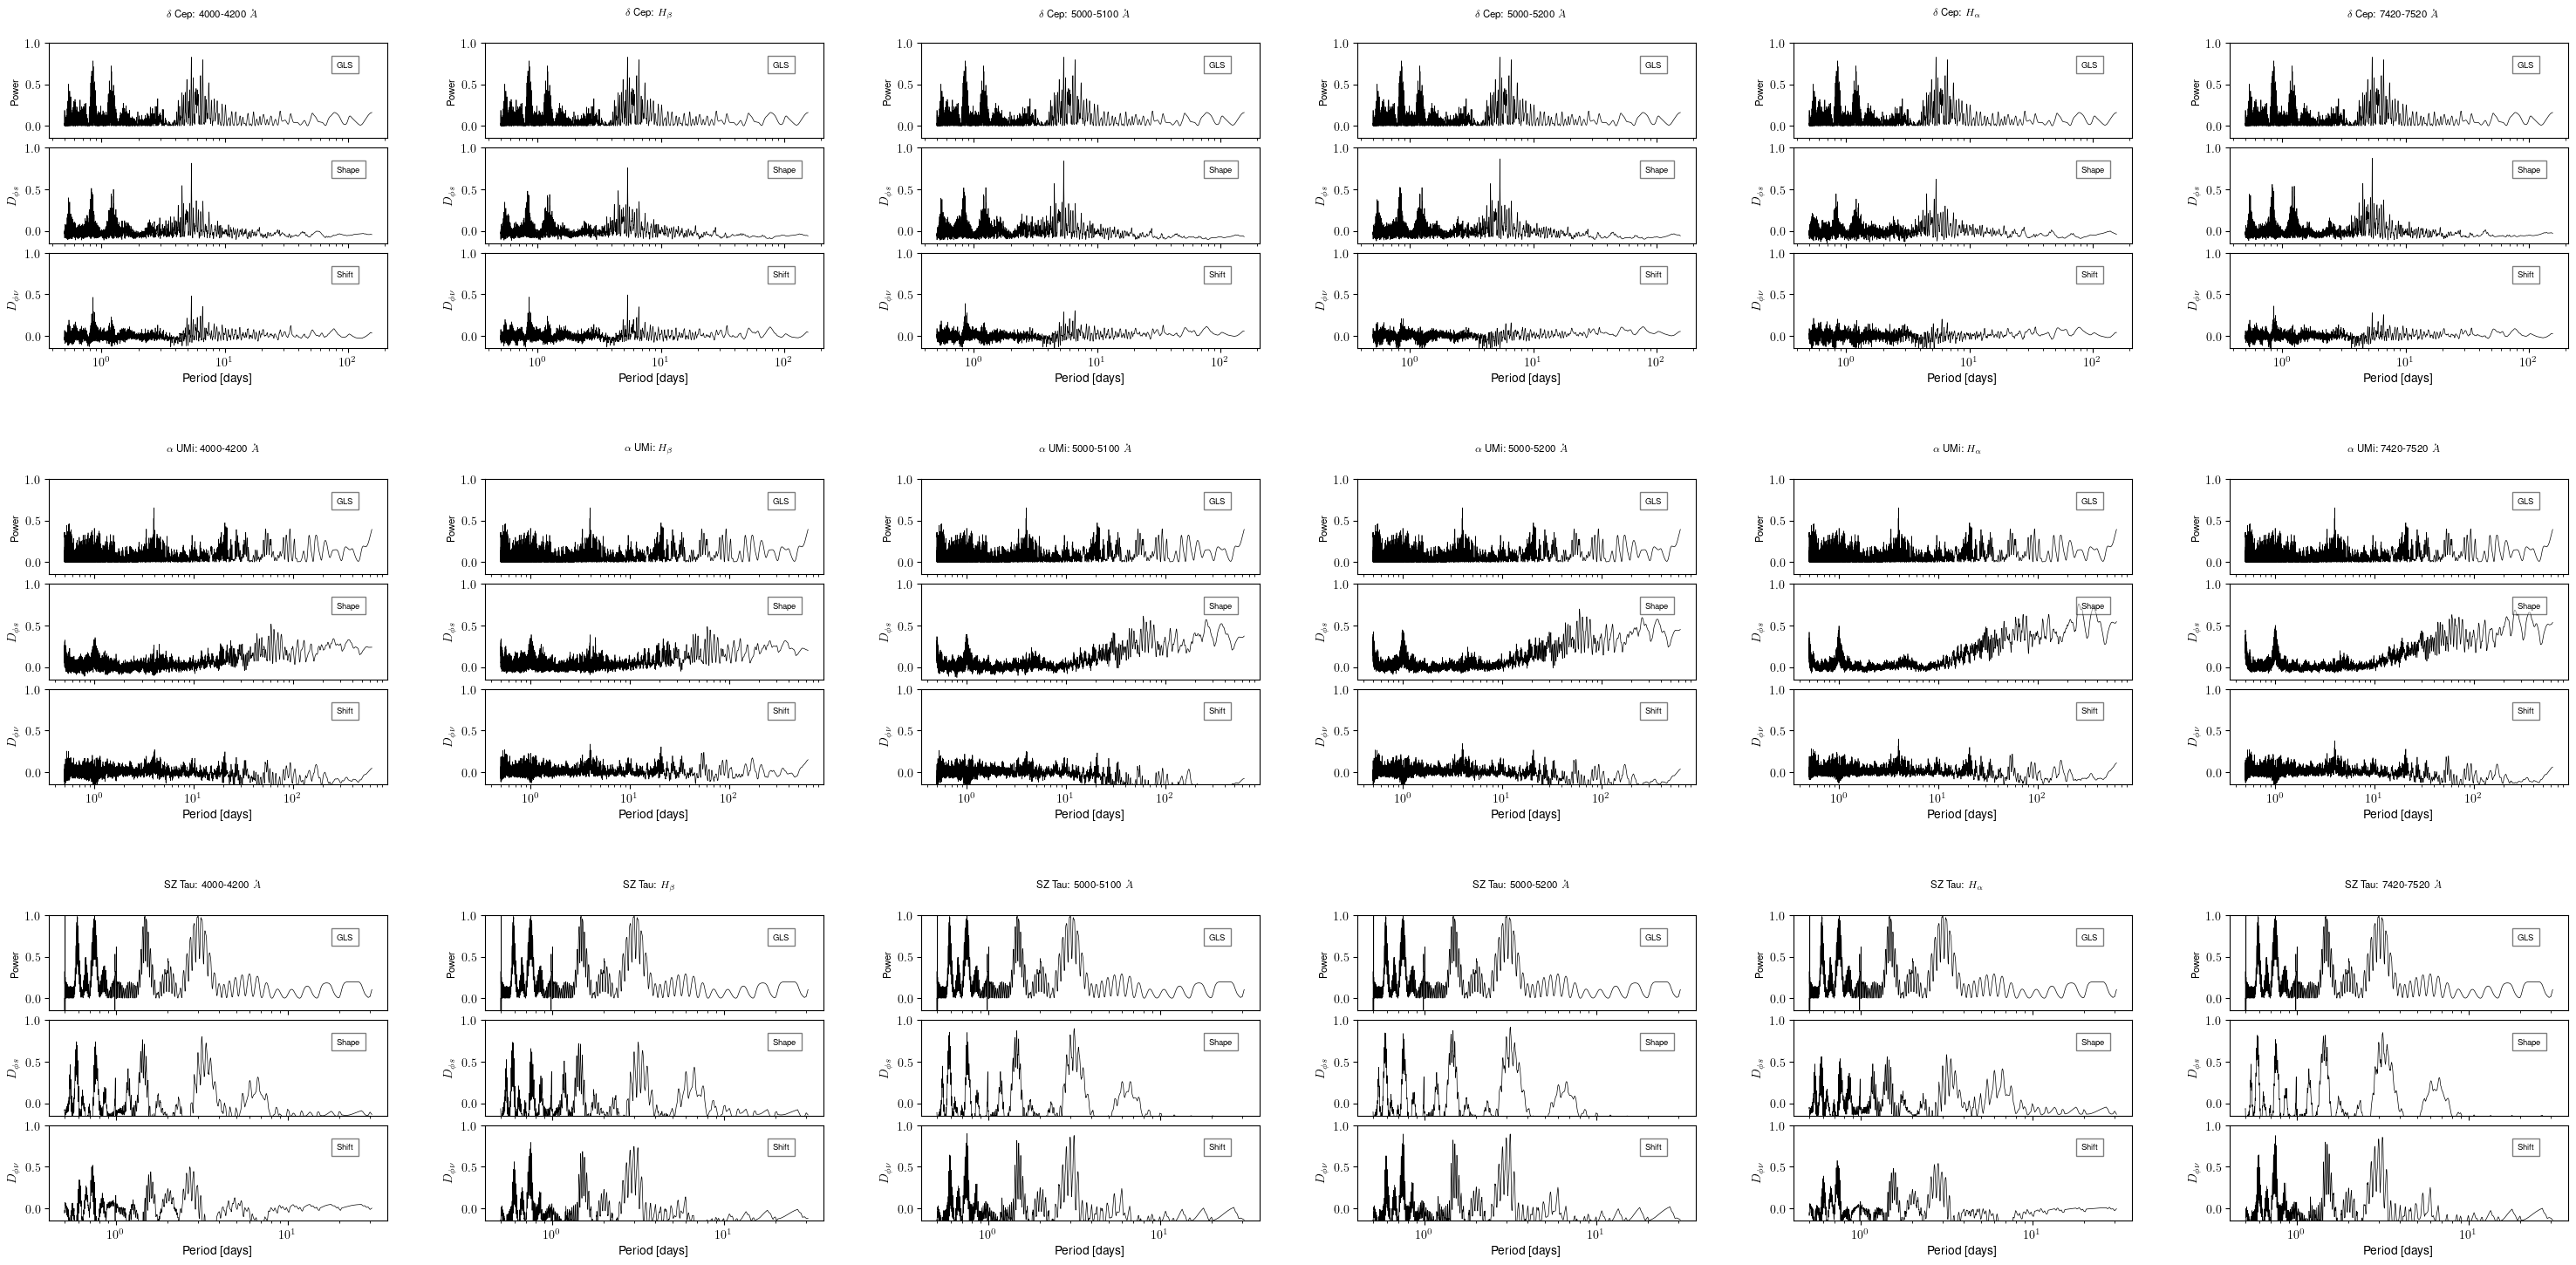

In [8]:
range_size = [r'4000-4200 $\AA$',r'$H_{\beta}$',r'5000-5100 $\AA$',r'5000-5200 $\AA$',r'$H_{\alpha}$',r'7420-7520 $\AA$']
all_results = [delCep_results,alfUMi_results,SZTau_results]
fig = plt.figure(constrained_layout=False, figsize=(30, 15))
fig.suptitle(r'delcep')

subfigs = fig.subfigures(3, 6)
for outerind, subfig in enumerate(subfigs.flat):
    if 0<=outerind<=5:
        results = all_results[0]
        star = r'$\delta$ Cep'
    elif 6<=outerind<=11:
        results = all_results[1]
        star = r'$\alpha$ UMi'
    elif 12<=outerind<=17:
        results = all_results[2]
        star = r'SZ Tau'
    axs = subfig.subplots(3,1,sharex=True,sharey = True)
    subfig.suptitle(star+': ' +str(range_size[outerind%6]), fontsize='small')
    for innerind, ax in enumerate(axs.flat):
        #put semilog(x)
        if innerind==0:
            ax.plot(results[outerind%6]['period'], results[outerind%6]['gls'],linewidth=0.5)
            ax.set_xscale('log')
            ax.set_ylabel('Power', fontsize='small')
        elif innerind==1:
            ax.plot(results[outerind%6]['period'], results[outerind%6]['shape'],linewidth=0.5)
            ax.set_xscale('log')
            ax.set_ylabel(r'$D_{\phi s}$')
        elif innerind==2:
            ax.plot(results[outerind%6]['period'],results[outerind%6]['shift'],linewidth=0.5)
            ax.set_xscale('log')
            ax.set_ylabel(r'$D_{\phi \nu}$')
            ax.set_xlabel(r'Period [days]')
        ax.set_ylim(-0.15,1)
        text_box = f"{['GLS', 'Shape', 'Shift'][innerind]}"
        ax.text(0.85, 0.75, text_box, transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5),fontsize = 'x-small')
plt.subplots_adjust(top=0.9, hspace=0.1, wspace=0.2,bottom=0.2)
plt.savefig('all_Hermes_post042018.pdf')
plt.show()